Classify pigmented skin lesions dermatoscopic images from HAM10k https://www.nature.com/articles/sdata2018161 into 7 diagnosis


In [ ]:
# IMPORT MODULES
import sys
from os.path import join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
#from tensorflow.python.keras.applications import ResNet50

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.models import Model,load_model
import itertools
from keras.applications.vgg16 import preprocess_input
import os
print(os.listdir("../"))

In [2]:
PATH = "../input/dermmel/DermMel/"
print(os.listdir(PATH))

['valid', 'train_sep', 'test']


In [3]:
# Check content of the dirs

PATHtrain = PATH + 'train_sep/'
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
Labels = os.listdir(PATHtrain)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtrain + label +'/')))
    sig = sig + len(os.listdir(PATHtrain + label +'/'))

print("Total TRAIN photos ", sig)
print("_"*50)

PATHvalid = PATH + 'valid/'
print(len(os.listdir(PATHvalid)), " VALID Directories of photos")
Labels = os.listdir(PATHvalid)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHvalid + label +'/')))
    sig = sig + len(os.listdir(PATHvalid + label +'/'))

print("Total Validation photos ", sig)
print("_"*50)

PATHtest = PATH + 'test/'
print(len(os.listdir(PATHtest)), " TEST Directories of photos")
Labels = os.listdir(PATHtest)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtest + label +'/')))
    sig = sig + len(os.listdir(PATHtest + label +'/'))

print("Total Testing photos ", sig)
print("_"*50)

2  TRAIN Directories of photos
Melanoma 5341
NotMelanoma 5341
Total TRAIN photos  10682
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1781
Total Validation photos  3562
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1780
Total Testing photos  3561
__________________________________________________


TRAIN  Melanoma  photo number  8


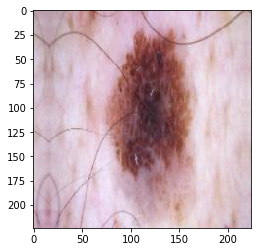

VALID  Melanoma  photo number  8


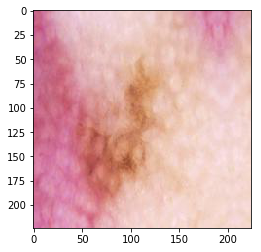

TEST  Melanoma  photo number  8


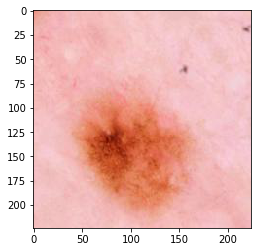

In [4]:
# Check the photos and their labels 

TestNum = 8
diag = 'Melanoma'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHvalid +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("VALID ",diag," photo number ", TestNum)
plt.show()

image_dir = PATHtest +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TEST ",diag," photo number ", TestNum)
plt.show()


In [5]:
# Convoluted Base MODEL

conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

print(conv_base.summary())

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________

In [6]:
# MODEL

model = models.Sequential()
model.add(conv_base)
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D((3, 3),padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.002)))
model.add(layers.Dense(256, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(2, activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         9437696   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         2359808   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 512)        

In [7]:
# Make the conv_base NOT trainable:

for layer in conv_base.layers[:]:
    layer.trainable = False

print('conv_base is now NOT trainable')

conv_base is now NOT trainable


for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

In [8]:
# Compile frozen conv_base + my top layer

model.compile(optimizer=optimizers.Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 512)         9437696   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 512)         2359808   
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 512)         2359808   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 

In [9]:
# Prep the Train Valid and Test directories for the generator

train_dir = PATHtrain
validation_dir = PATHvalid
test_dir = PATHtest
batch_size = 20
target_size=(224, 224)

#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=target_size,batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=batch_size)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.
